In [184]:
import pandas as pd
import numpy as np

**Intial Data Inspection**

In [185]:
df = pd.read_csv("data/May/May14.csv", header=None, names=["Metric", "Value"])
df.head()

,Metric,Value
0,Sleep Score 1 Day,NaN
1,Date,2025-05-14
2,Sleep Duration,7h 55m
3,Sleep Score,86
4,Quality,Good


In [186]:
df.dtypes

Metric    object
Value     object
dtype: object

**Rotation of the Columns and rows**

In [187]:
df_wide = df.set_index("Metric").T
print(df_wide.dtypes)
df_wide.index = pd.to_datetime(df_wide.loc[:, "Date"])
df_wide = df_wide.drop(columns="Date")
df_wide.head()

Metric
Sleep Score 1 Day         object
Date                      object
Sleep Duration            object
Sleep Score               object
Quality                   object
Sleep Score Factors       object
Sleep Duration            object
Stress Avg                object
Deep Sleep Duration       object
Light Sleep Duration      object
REM Duration              object
Awake Time                object
Sleep Timeline Metrics    object
Restless Moments          object
Resting Heart Rate        object
Body Battery Change       object
Avg SpO₂                  object
Lowest SpO2               object
Avg Respiration           object
Lowest Respiration        object
Avg Overnight HRV         object
7d Avg HRV                object
dtype: object


Metric,Sleep Score 1 Day,Sleep Duration,Sleep Score,Quality,Sleep Score Factors,Sleep Duration,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,...,Sleep Timeline Metrics,Restless Moments,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-14,NaN,7h 55m,86,Good,NaN,7h 55m,20,1h 54m,4h 27m,1h 34m,...,NaN,34,50 bpm,+79,95%,85%,14 brpm,12 brpm,82 ms,Low


**Cleansing of the dataset**

In [188]:
print(df_wide.isnull().sum())
df_wide = df_wide.drop(columns=['Sleep Score 1 Day', 'Sleep Score Factors', 'Sleep Timeline Metrics'])
df_wide.head()

Metric
Sleep Score 1 Day         1
Sleep Duration            0
Sleep Score               0
Quality                   0
Sleep Score Factors       1
Sleep Duration            0
Stress Avg                0
Deep Sleep Duration       0
Light Sleep Duration      0
REM Duration              0
Awake Time                0
Sleep Timeline Metrics    1
Restless Moments          0
Resting Heart Rate        0
Body Battery Change       0
Avg SpO₂                  0
Lowest SpO2               0
Avg Respiration           0
Lowest Respiration        0
Avg Overnight HRV         0
7d Avg HRV                0
dtype: int64


Metric,Sleep Duration,Sleep Score,Quality,Sleep Duration,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Restless Moments,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
Date,,,,,,,,,,,,,,,,,,
2025-05-14,7h 55m,86,Good,7h 55m,20,1h 54m,4h 27m,1h 34m,13m,34,50 bpm,+79,95%,85%,14 brpm,12 brpm,82 ms,Low


**Importing of all of the data files concatinating and performing data cleanse**

In [189]:
import glob
file_paths = glob.glob("data/May/*.csv")
frames = []

for path in file_paths:
    df_bulk = pd.read_csv(path, header=None, names=["Metric", "Value"])
    df_bulk = df_bulk.set_index("Metric").T
    date = df_bulk.loc["Value", "Date"]
    df_bulk.index = pd.to_datetime([date])
    df_bulk = df_bulk.loc[:, ~df_bulk.columns.duplicated()]

    df_bulk = df_bulk.drop(
        columns=[
            'Date',
            'Sleep Score 1 Day',
            'Sleep Score Factors',
            'Sleep Timeline Metrics',
            'Total Sleep Duration',
            'Sleep 1 Day'], errors='ignore'
        )
    
    frames.append(df_bulk)

Bigdf = pd.concat(frames, axis=0).reset_index()
Bigdf = Bigdf.rename(columns={'index': 'WorkoutDate'})


    
Bigdf.dtypes



Metric
WorkoutDate             datetime64[ns]
Sleep Duration                  object
Sleep Score                     object
Quality                         object
Stress Avg                      object
Deep Sleep Duration             object
Light Sleep Duration            object
REM Duration                    object
Awake Time                      object
Restless Moments                object
Resting Heart Rate              object
Body Battery Change             object
Avg SpO₂                        object
Lowest SpO2                     object
Avg Respiration                 object
Lowest Respiration              object
Avg Overnight HRV               object
7d Avg HRV                      object
dtype: object

**Importing and cleansing data from Workouts**

In [190]:
df = pd.read_csv("data/workouts.csv")
df_workouts = df.drop(columns=[
    'Title',
'WorkoutDescription',
'PlannedDistanceInMeters',
'CoachComments',
'PowerMax',
'Energy',
'AthleteComments',
'CadenceMax',
'HeartRateMax',
'TorqueAverage',
'TorqueMax',
'HRZone1Minutes',
'HRZone2Minutes',
'HRZone3Minutes',
'HRZone4Minutes',
'HRZone5Minutes',
'HRZone6Minutes',
'HRZone7Minutes',
'HRZone8Minutes',
'HRZone9Minutes',
'HRZone10Minutes',
'PWRZone1Minutes',
'PWRZone2Minutes',
'PWRZone3Minutes',
'PWRZone4Minutes',
'PWRZone5Minutes',
'PWRZone6Minutes',
'PWRZone7Minutes',
'PWRZone8Minutes',
'PWRZone9Minutes',
'PWRZone10Minutes',
])
display(df_workouts)

,WorkoutType,PlannedDuration,WorkoutDay,DistanceInMeters,PowerAverage,TimeTotalInHours,VelocityAverage,VelocityMax,CadenceAverage,HeartRateAverage,IF,TSS,Rpe,Feeling
0,Run,0.500000,2025-04-01,2513.370117,NaN,0.224468,3.110000,NaN,160.0,141.0,0.710459,12.07,2.0,7.0
1,Bike,3.000000,2025-04-01,90197.031250,210.0,3.388489,7.394000,NaN,85.0,152.0,0.812541,222.87,NaN,NaN
2,Swim,0.750000,2025-04-02,2200.000000,NaN,0.600814,1.011960,NaN,53.0,NaN,1.006966,61.35,NaN,NaN
3,Run,0.666667,2025-04-03,5221.459961,NaN,0.503337,2.882000,NaN,162.0,150.0,0.658238,23.77,3.0,5.0
4,Swim,0.750000,2025-04-04,2400.000000,NaN,0.691185,0.958084,NaN,53.0,NaN,0.954882,60.18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Strength,0.500000,2025-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Bike,NaN,2025-05-13,41391.109375,39.0,2.080893,5.525000,NaN,71.0,123.0,0.596650,83.59,NaN,NaN
67,Bike,1.166667,2025-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Swim,0.666667,2025-05-14,1800.000000,NaN,0.537405,0.924025,NaN,54.0,NaN,0.921093,42.00,NaN,NaN


**Investigating TSS and IF on Sleep**

*Cleaning data for daily instead of multiple a day*

In [191]:
df['WorkoutDay'] = pd.to_datetime(df['WorkoutDay'])
df_dayworkouts = (
    df
    .groupby('WorkoutDay')
    .agg({
        'WorkoutType': lambda x: list(x.unique()),
        'PlannedDuration': 'sum',
        'DistanceInMeters': 'sum',
        'TimeTotalInHours': 'sum',
        'TSS': 'sum',
        'IF': 'mean',
        'HeartRateAverage': 'mean',
    })
    .reset_index()
)


*Merging the two datasets together on date*

In [192]:
merged = Bigdf.merge(
    df_dayworkouts,
    left_on='WorkoutDate',
    right_on='WorkoutDay',
    how='left',    # must be 'left', not 'Left'
    suffixes=('', '_wk')  # just in case you have overlapping column names
)

merged.head()

,WorkoutDate,Sleep Duration,Sleep Score,Quality,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Restless Moments,...,Avg Overnight HRV,7d Avg HRV,WorkoutDay,WorkoutType,PlannedDuration,DistanceInMeters,TimeTotalInHours,TSS,IF,HeartRateAverage
0,2025-05-08,6h 42m,80,Good,13,1h 39m,4h 8m,55m,1m,27,...,78 ms,Balanced,2025-05-08,"[Run, Walk]",0.816667,11640.829834,1.589079,45.66,0.489970,100.0
1,2025-05-09,7h 38m,73,Fair,24,1h 30m,5h 21m,47m,45m,35,...,65 ms,Balanced,2025-05-09,"[Swim, Bike, Run, Other]",2.650000,10059.459961,1.533339,77.58,0.697936,128.0
2,2025-05-01,7h 14m,74,Fair,24,1h 33m,4h 43m,58m,18m,41,...,70 ms,Balanced,2025-05-01,[Run],0.916667,9017.740234,0.920442,38.10,0.611842,155.0
3,2025-05-13,7h 32m,84,Good,15,1h 26m,5h 2m,1h 4m,13m,40,...,69 ms,Low,2025-05-13,[Bike],1.166667,41391.109375,2.080893,83.59,0.596650,123.0
4,2025-05-12,7h 47m,73,Fair,20,1h 23m,5h 52m,32m,--,47,...,50 ms,Low,2025-05-12,"[Swim, Strength]",1.250000,0.000000,0.000000,0.00,NaN,NaN


In [193]:
import re

def parse_duration(s):
    """“7h 55m” → Timedelta('0 days 07:55:00'), “13m” → Timedelta('0 days 00:13:00')"""
    if pd.isna(s):
        return pd.NaT
    hrs = re.search(r'(\d+)\s*h', s)
    mins = re.search(r'(\d+)\s*m', s)
    h = int(hrs.group(1)) if hrs else 0
    m = int(mins.group(1)) if mins else 0
    return pd.Timedelta(hours=h, minutes=m)

def parse_int(s):
    """Strip non-digits (and leading “+”/“–”), return nullable Int64"""
    if pd.isna(s):
        return pd.NA
    num = re.sub(r'[^\d\-+]', '', str(s))
    return pd.to_numeric(num, errors='coerce')

def parse_pct(s):
    """“95%” → 95 (Int64)"""
    if pd.isna(s):
        return pd.NA
    return pd.to_numeric(str(s).rstrip('%'), errors='coerce')

# 3) Apply conversions

# Durations → Timedelta
for col in [
    'Sleep Duration',
    'Deep Sleep Duration',
    'Light Sleep Duration',
    'REM Duration',
    'Awake Time'
]:
    merged[col] = merged[col].apply(parse_duration)

# Simple integers
for col in [
    'Sleep Score',
    'Stress Avg',
    'Restless Moments'
]:
    merged[col] = merged[col].apply(parse_int)

# Heart rates, respiration, HRV, battery change
for col in [
    'Resting Heart Rate',      # e.g. “50 bpm”
    'Avg Respiration',         # e.g. “14 brpm”
    'Lowest Respiration',      # e.g. “12 brpm”
    'Avg Overnight HRV',       # e.g. “82 ms”
    'Body Battery Change'      # e.g. “+79”
]:
    merged[col] = merged[col].apply(parse_int)

# Percentages
merged['Avg SpO₂']    = merged['Avg SpO₂'].apply(parse_pct)
merged['Lowest SpO2'] = merged['Lowest SpO2'].apply(parse_pct)

# Categorical
merged['Quality']   = merged['Quality'].astype('category')
merged['7d Avg HRV'] = merged['7d Avg HRV'].astype('category')

# 4) Check your result
print(merged.dtypes)

WorkoutDate              datetime64[ns]
Sleep Duration          timedelta64[ns]
Sleep Score                      object
Quality                        category
Stress Avg                       object
Deep Sleep Duration     timedelta64[ns]
Light Sleep Duration    timedelta64[ns]
REM Duration            timedelta64[ns]
Awake Time              timedelta64[ns]
Restless Moments                 object
Resting Heart Rate              float64
Body Battery Change             float64
Avg SpO₂                        float64
Lowest SpO2                     float64
Avg Respiration                 float64
Lowest Respiration              float64
Avg Overnight HRV               float64
7d Avg HRV                     category
WorkoutDay               datetime64[ns]
WorkoutType                      object
PlannedDuration                 float64
DistanceInMeters                float64
TimeTotalInHours                float64
TSS                             float64
IF                              float64


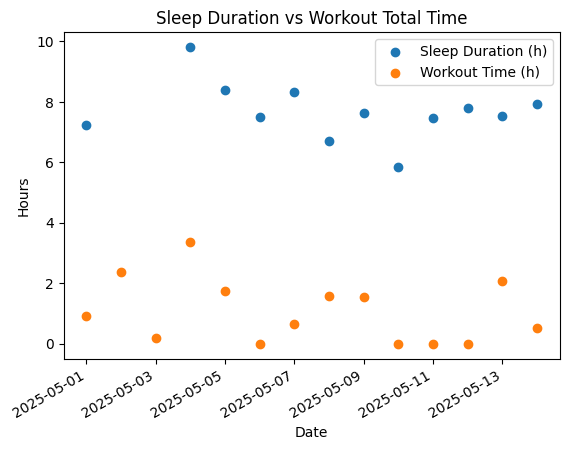

In [194]:
import matplotlib.pyplot as plt

# Replace `merged` with whatever your DataFrame is called
df = merged.copy()

# Convert sleep timedelta into numeric hours
df['SleepHours'] = df['Sleep Duration'].dt.total_seconds() / 3600

# Plot
fig, ax = plt.subplots()
ax.scatter(df['WorkoutDate'], df['SleepHours'], label='Sleep Duration (h)')
ax.scatter(df['WorkoutDate'], df['TimeTotalInHours'], label='Workout Time (h)')
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Sleep Duration vs Workout Total Time')
ax.legend()
fig.autofmt_xdate()
plt.show()

**Investigating Total Sleep Time Vs Total Day Workout**

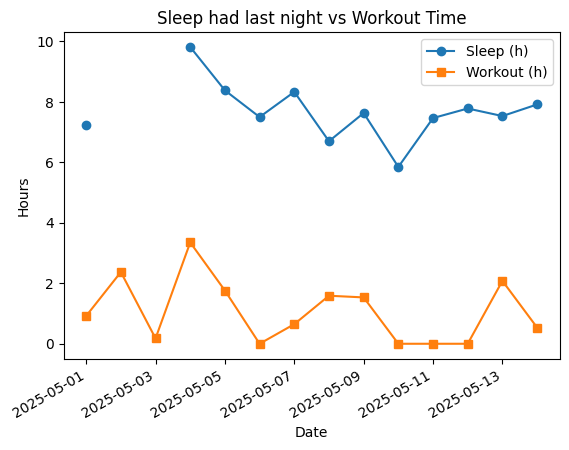

In [202]:
import matplotlib.pyplot as plt

df = merged.sort_values('WorkoutDate')

df['SleepHours'] = df['Sleep Duration'].dt.total_seconds() / 3600

fig, ax = plt.subplots()
ax.plot(df['WorkoutDate'], df['SleepHours'], marker='o', label='Sleep (h)')
ax.plot(df['WorkoutDate'], df['TimeTotalInHours'], marker='s', label='Workout (h)')
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Sleep had last night vs Workout Time')
ax.legend()
fig.autofmt_xdate()
plt.show()


*They are not correct as the sleep of the day is actually from the previous night* \n
So lets Change this and compare the sleep of the after and the workotus today

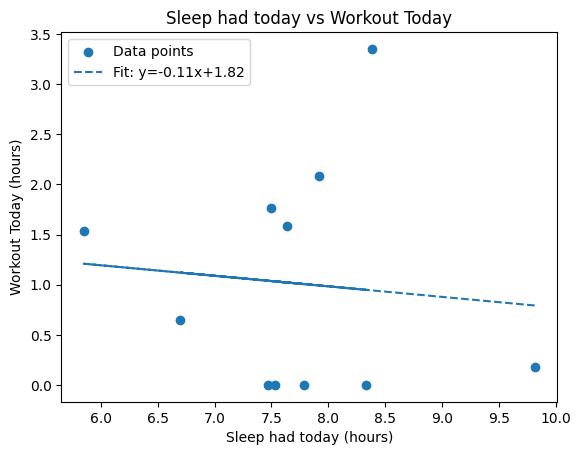

In [201]:
df2 = merged.copy().sort_values('WorkoutDate')
df2['SleepHours'] = df2['Sleep Duration'].dt.total_seconds() / 3600
df2['SleepTonight'] = df2['SleepHours'].shift(-1)
df2 = df2.dropna(subset=['SleepTonight', 'TimeTotalInHours'])

# 2) Scatter + linear fit
x = df2['SleepTonight']
y = df2['TimeTotalInHours']

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data points')

# Fit a line
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, '--', label=f'Fit: y={m:.2f}x+{b:.2f}')

# 3) Labels & title
ax.set_xlabel("Sleep had today (hours)")
ax.set_ylabel("Workout Today (hours)")
ax.set_title("Sleep had today vs Workout Today")
ax.legend()

plt.show()

**Investigating the Ratio of Deep Sleep vs Training Stress Score**

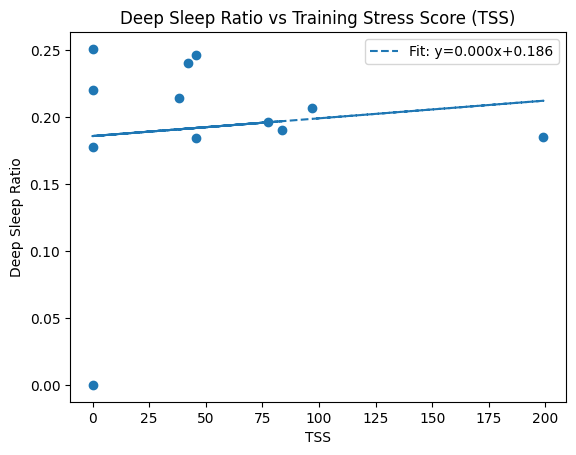

In [ ]:

df = merged.copy()
#Deep Sleep Ratio
df['DeepSleepRatio'] = (
    df['Deep Sleep Duration'].dt.total_seconds()
    / df['Sleep Duration'].dt.total_seconds()
)

df = df[['TSS', 'DeepSleepRatio']].dropna()


fig, ax = plt.subplots()
ax.scatter(df['TSS'], df['DeepSleepRatio'])

m, b = np.polyfit(df['TSS'], df['DeepSleepRatio'], 1)
ax.plot(df['TSS'], m * df['TSS'] + b, linestyle='--', label=f'Fit: y={m:.3f}x+{b:.3f}')

ax.set_xlabel('TSS')
ax.set_ylabel('Deep Sleep Ratio')
ax.set_title('Deep Sleep Ratio vs Training Stress Score (TSS)')
ax.legend()

plt.show()


*Above there is no correlation between deep sleep and Training Stress score*

So lets compare the tss the from yesterday vs deep sleep ratio

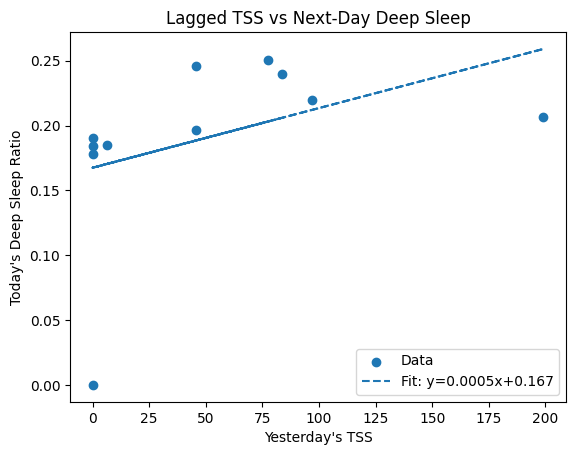

In [ ]:

df2 = merged.copy().sort_values('WorkoutDate')

df2['DeepSleepRatio'] = (
    df2['Deep Sleep Duration'].dt.total_seconds()
    / df2['Sleep Duration'].dt.total_seconds()
)

# Lag  
df2['TSS_yesterday'] = df2['TSS'].shift(1)

clean = df2[['TSS_yesterday','DeepSleepRatio']].dropna()

fig, ax = plt.subplots()
ax.scatter(clean['TSS_yesterday'], clean['DeepSleepRatio'], label="Data")

m, b = np.polyfit(clean['TSS_yesterday'], clean['DeepSleepRatio'], 1)
ax.plot(clean['TSS_yesterday'], m*clean['TSS_yesterday'] + b, '--',
        label=f"Fit: y={m:.4f}x+{b:.3f}")

ax.set_xlabel("Yesterday's TSS")
ax.set_ylabel("Today's Deep Sleep Ratio")
ax.set_title("Lagged TSS vs Next-Day Deep Sleep")
ax.legend()

plt.show()


Lets try and with some rolling average dates and TSS

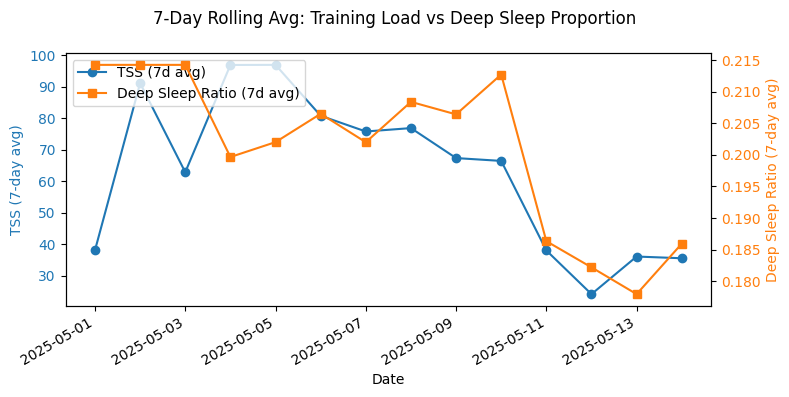

In [207]:
df2 = merged.copy().sort_values('WorkoutDate')
df2['DeepSleepRatio'] = (
    df2['Deep Sleep Duration'].dt.total_seconds() /
    df2['Sleep Duration'].dt.total_seconds()
)
df2['TSS_7d']        = df2['TSS'].rolling(window=7, min_periods=1).mean()
df2['DeepRatio_7d'] = df2['DeepSleepRatio'].rolling(window=7, min_periods=1).mean()

# 2) Plot with twin y‐axes
fig, ax1 = plt.subplots(figsize=(8,4))

# Left axis: TSS
ax1.plot(df2['WorkoutDate'], df2['TSS_7d'],
         color='tab:blue', marker='o', label='TSS (7d avg)')
ax1.set_xlabel('Date')
ax1.set_ylabel('TSS (7-day avg)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right axis: Deep Sleep Ratio
ax2 = ax1.twinx()
ax2.plot(df2['WorkoutDate'], df2['DeepRatio_7d'],
         color='tab:orange', marker='s', label='Deep Sleep Ratio (7d avg)')
ax2.set_ylabel('Deep Sleep Ratio (7-day avg)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Common formatting
fig.autofmt_xdate()
fig.suptitle('7-Day Rolling Avg: Training Load vs Deep Sleep Proportion')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [208]:
df2 = merged.copy().sort_values('WorkoutDate')
df2['SleepHoursLastNight'] = (
    df2['Sleep Duration'].dt.total_seconds() / 3600
).shift(1)
df2['DeepSleepRatio'] = (
    df2['Deep Sleep Duration'].dt.total_seconds() /
    df2['Sleep Duration'].dt.total_seconds()
)
df2['TSS_yesterday'] = df2['TSS'].shift(1)

# 2) Pick the numeric columns you care about
cols = [
    'SleepHoursLastNight',
    'TimeTotalInHours',
    'TSS',
    'TSS_yesterday',
    'DeepSleepRatio',
    'IF',
    'Resting Heart Rate',
    'Avg Overnight HRV'
]

# 3) Compute the correlation matrix
corr = df2[cols].corr()
print(corr)


                     SleepHoursLastNight  TimeTotalInHours       TSS  \
SleepHoursLastNight             1.000000          0.267844  0.213572   
TimeTotalInHours                0.267844          1.000000  0.962774   
TSS                             0.213572          0.962774  1.000000   
TSS_yesterday                   0.757261         -0.146771 -0.126916   
DeepSleepRatio                  0.628783          0.164809  0.116216   
IF                             -0.384748         -0.044995  0.239105   
Resting Heart Rate             -0.664264         -0.576587 -0.589345   
Avg Overnight HRV               0.818294          0.473371  0.485069   

                     TSS_yesterday  DeepSleepRatio        IF  \
SleepHoursLastNight       0.757261        0.628783 -0.384748   
TimeTotalInHours         -0.146771        0.164809 -0.044995   
TSS                      -0.126916        0.116216  0.239105   
TSS_yesterday             1.000000        0.415766 -0.240067   
DeepSleepRatio            0.415